This is a first attempt to play with the Keras interface of the TensorFlow package. I will be reproducing a dense neural network used for predicting whether patients have diabetes.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd "/content/drive/Othercomputers/My MacBook Pro/portfolio/arpogg24.github.io/machine-learning/IBM-Machine-Learning/deep-learning/diabetes_classification"

/content/drive/Othercomputers/My MacBook Pro/portfolio/arpogg24.github.io/machine-learning/IBM-Machine-Learning/deep-learning/diabetes_classification


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.optimizers import SGD

In [ ]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(diabetes_df.shape)

(768, 9)


In [ ]:
features = [x for x in diabetes_df.columns.tolist() if x != "Outcome"]
X = diabetes_df[features].values
y = diabetes_df["Outcome"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(str(100*np.mean(y)) + " percent of patients have diabetes; " + str(100*np.mean(1 - y)) + " do not.")

34.89583333333333 percent of patients have diabetes; 65.10416666666666 do not.


From the above, we see that we could achieve a baseline accuracy of approximately 65% just by predicting that no one has diabetes.

We begin by fitting a Keras normalizer (which produces a standard scaling) on the training data:

In [ ]:
input_normalizer = Normalization(input_dim = 8, axis = -1)
input_normalizer.adapt(X_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
nn_classifier_1 = Sequential([input_normalizer,
                              Dense(units = 12, activation = "sigmoid"),
                              Dense(units = 1, activation = "sigmoid")])
nn_classifier_1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_23 (Normalization)     │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 138 (556.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 17 (72.00 B)

In [ ]:
nn_classifier_1.compile(SGD(learning_rate = 0.005), "binary_crossentropy", metrics = ["accuracy"])
run_1_nn_classifier_1 = nn_classifier_1.fit(X_train, y_train,
                                            validation_data = (X_test, y_test),
                                            epochs = 600)

Epoch 1/600
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7275 - loss: 0.5436 - val_accuracy: 0.7100 - val_loss: 0.5499
Epoch 2/600
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7306 - loss: 0.5404 - val_accuracy: 0.7100 - val_loss: 0.5494
Epoch 3/600
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7234 - loss: 0.5531 - val_accuracy: 0.7186 - val_loss: 0.5489
Epoch 4/600
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 0.5477 - val_accuracy: 0.7186 - val_loss: 0.5485
Epoch 5/600
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6929 - loss: 0.5708 - val_accuracy: 0.7186 - val_loss: 0.5481
Epoch 6/600
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7347 - loss: 0.5399 - val_accuracy: 0.7186 - val_loss: 0.5476
Epoch 7/600
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7236 - loss: 0.5567 - val_accuracy: 0.7143 - val_loss: 0.5472
Epoch 8/600
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7314 - loss: 0.5439 - val_accuracy: 0.7143 - 

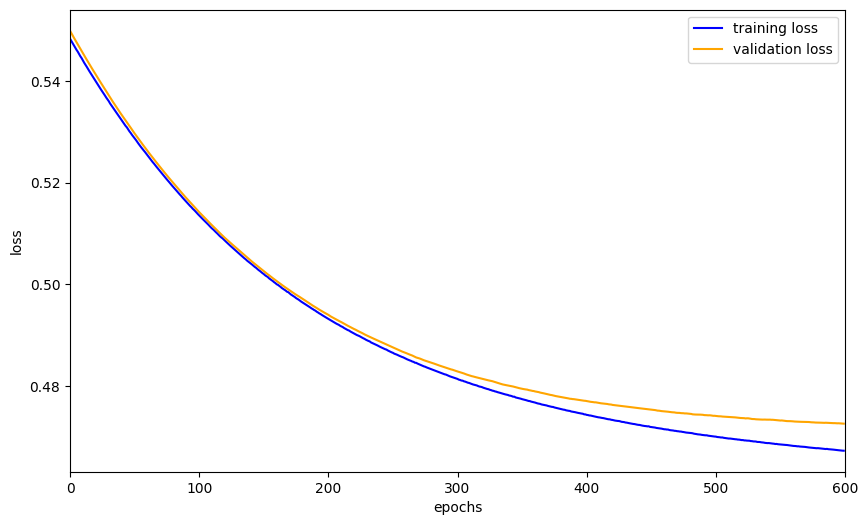

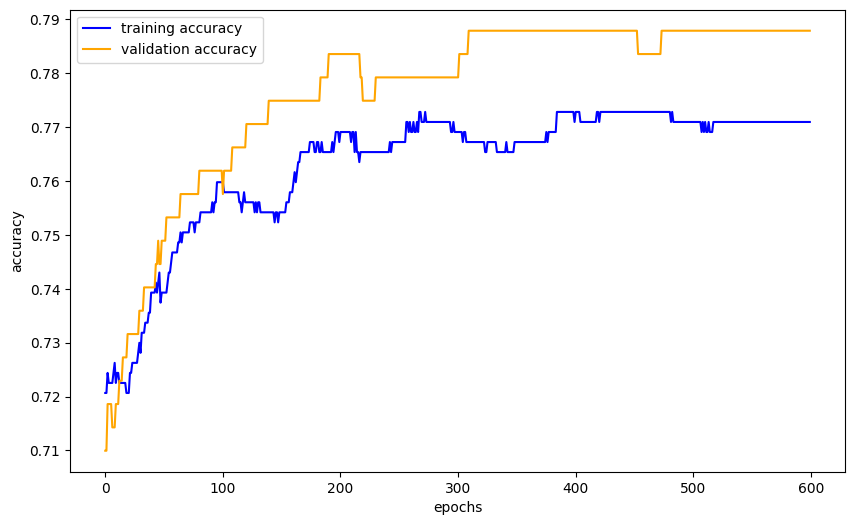

In [ ]:
fig, ax = plt.subplots(1, figsize = (10,6))
ax.plot(run_1_nn_classifier_1.history["loss"], color = "blue", label = "training loss")
ax.plot(run_1_nn_classifier_1.history["val_loss"], color = "orange", label = "validation loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xlim([0,600])
plt.show()

fig, ax = plt.subplots(1, figsize = (10,6))
#ax.plot([-10, 610],[np.mean(1-y), np.mean(1-y)], color = "black", label = "baseline accuracy")
ax.plot(run_1_nn_classifier_1.history["accuracy"], color = "blue", label = "training accuracy")
ax.plot(run_1_nn_classifier_1.history["val_accuracy"], color = "orange", label = "validation accuracy")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()